# Project: Wrangle and Analyze Data

## Introduction
> Many would argue, a dog is a man's most loyal companion. Little wonder, dog lovers around the globe have learnt to care for their pets and pay them such attention, most have even become functional parts of many families. It is no surprise then that, a dog owner gets so curious, s/he wants to know how his/her dog compares against others of same/different breeds.

> Enter WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

![WeRateDogsTwitter](https://video.udacity-data.com/topher/2017/October/59dd378f_dog-rates-social/dog-rates-social.jpg)

> The sole purpose of this project is to gather, explore, analyze, clean data from a real world scenario - in this case, WeRateDogs Twitter Archive. Afterwards, we store then draw insights plus visualizations from it. The WeRateDogs Twitter Archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1st, 2017.

> Also, 3 sets of data are needed for this project: twitter-archive-enhanced.csv, image_predictions.tsv and tweet_json.txt.

> Now, a quick intro to our variables:

*   **tweet_id**: Unique identification code, usually a string of numbers, attached to each tweet.	
*   **in_reply_to_status_id**: Unique identifying code attached to each tweet's reply. 	
*   **in_reply_to_user_id**: Unique code used to identify users that reply to tweets.	
*   **timestamp**: Time of tweet.	
*   **source**: url of tweet.	
*   **text**: Texts in a tweet.	
*   **retweeted_status_id**: Unique code identifying a retweet.	
*   **retweeted_status_user_id**: Unique code identifying a user that retweets a status.	
*   **retweeted_status_timestamp**: Time of retweet.	
*   **expanded_urls**: Full - not shortened - links.	
*   **rating_numerator**: The first part of a rating, usually before the **"/"** symbol.	
*   **rating_denominator**: THe second part of a rating. Usually after the **"/"** symbol.	
*   **name**: Name of dog being rated.
*   **doggo**: Dog stage "doggo." Usually applies to "cute dogs."	
*   **floofer**: Dog stage "floof." Usually applies to dogs with so much "fluff."
*   **pupper**: Dog stage "pupper." A small doggo is a "pupper."	
*   **puppo**: Dog stage "puppo." A puppy.
*   **jpg_url**: Link to image.	
*   **img_num**: Number of images attached to a tweet.	
*   **p1**: Algorithm's  Number 1 prediction for the image in the tweet.
*   **p1_conf**: How confident the algorithm is in its Number 1 prediction. 	
*   **p1_dog**: Whether or not the Number 1 prediction is a breed of dog.	
*   **p2**: Algorithm's  Number 2 prediction for the image in the tweet.	
*   **p2_conf**: How confident the algorithm is in its Number 2 prediction.
*   **p2_dog**: Whether or not the number 2 prediction is a breed of dog.	
*   **p3**: Algorithm's number 3 prediction for the image in the tweet.	
*   **p3_conf**: How confident the algorithm is in its number 3 prediction.	
*   **p3_dog**: Whether or not the number 3 prediction is a breed of dog.
*   **id_str**: Same as **tweet_id** above.	
*   **retweet_count**: Number of retweets. 	
*   **favorite_count**: Number of favorites attached to a tweet.
*   **day**: Day of the week a tweet was made.

So, lets get down to business...

In [1]:
#We begin by importing all necessary tools from python library.
import pandas as pd
import numpy as np
import requests
import json
import zipfile
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from timeit import default_timer as timer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib

In [2]:
#To display full (non-truncated) dataframe information.

pd.set_option('display.max_colwidth', -1)

C:\Users\HP Compaq\AppData\Local\Temp\ipykernel_2016\3079850530.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Data Gathering
Here, we gather **all** three pieces of data for this project and load them in the notebook using different gathering methods.

![](https://cdn-icons-png.flaticon.com/512/2103/2103533.png)

**1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv) and load it programatically into dataframe**.

In [4]:
twitter_archive_data = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image-predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [6]:
#gathering using pandas
tweet_image_predictions = pd.read_csv("image-predictions.tsv", sep="\t")
tweet_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [7]:
# create a function for tweet data
# file already created so no need to execute to continue the notebook
def tweet_data():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [8]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [9]:
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])
tweet_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
![](https://www.isd518.net/wp-content/uploads/2020/01/Data-and-Assessment-300x211.jpg)
Raw data rarely comes clean, there are always isssues with tidiness and quality. Here, we do a visual and programmatic inspection of our data sets, we detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 

##### Visual Assessment

In [10]:
#Lets take a close look at the twitter archive data

twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


* Certain values missing in following columns: __in_reply_to_user_id__, __in_reply_to_status_id__, __retweeted_status_user_id__, __expanded_urls__, __retweeted_status_id__ and __retweeted_status_timestamp__.

* The column name __floofer__ is a mispell. It ought to be __'floof'__.
* Some ratings in the __text__ column do not correspond with the __rating_numerator__ and __rating_denominator__ columns. A number of tweets refer to two dogs.

In [11]:
#The first 50 entries of the actual texts of the tweets could give us something...

twitter_archive_data.text.head(50)

0     This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3     This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5     Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) 

* Several variables like urls, ratings.

In [12]:
#Taking a look at the first 20 entries in the image predictions table...

tweet_image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


* Dog breeds in columns __p1__, __p2__, and __p3__ shows irregular case types. Some are in upper case, others in lower.

In [13]:
#First 20 entries in the tweet count table too...

tweet_count.head(20)

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


*   **id_str** here is basically **tweet_id** in other tables.

## Summary of Visual Assessment

### Quality issues
### `twitter_archive_data`
* Certain values missing in following columns: __in_reply_to_user_id__, __in_reply_to_status_id__, __retweeted_status_user_id__, __expanded_urls__, __retweeted_status_id__ and __retweeted_status_timestamp__.

* The column name __floofer__ is a mispell. It ought to be __'floof'__.
* Some ratings in the __text__ column do not correspond with the __rating_numerator__ and __rating_denominator__ columns.

### `tweet_image_predictions`

* Dogs breeds in columns __p1__, __p2__, and __p3__ shows irregular case types. Some are in upper case, others in lower.

### Tidiness issues
* The **text** column shows several variables like urls, ratings, plus... a number of tweets refer to two dogs.

* Related data in `tweet_count` and `twitter_archive_data` tables. Both ought to be merged.

##### Programmatic Assessment

In [14]:
#First, we check for data type inconsistencies in twiiter archive table by using the .info command.

twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> * **tweet_id** data type is int64. It should rather be object.
> * **timestamp** ought to be in datetime64 data type.

In [15]:
#Next, lets search for missing values... dog stages - doggo, floofer, puppo, pupper - is where we begin.
#We'll take value counts of each dog stage, if  a stage does not equal 2356, there are missing values.

doggo = twitter_archive_data.doggo.value_counts()
doggo

None     2259
doggo    97  
Name: doggo, dtype: int64

In [16]:
floofer = twitter_archive_data.floofer.value_counts()
floofer

None       2346
floofer    10  
Name: floofer, dtype: int64

In [17]:
puppo = twitter_archive_data.puppo.value_counts()
puppo

None     2326
puppo    30  
Name: puppo, dtype: int64

In [18]:
pupper = twitter_archive_data.pupper.value_counts()
pupper

None      2099
pupper    257 
Name: pupper, dtype: int64

> * There are missing values in dogs stages.

In [19]:
# Since there is "None" under "names," we search for missing values in names too by taking value counts.

twitter_archive_data.name.value_counts().head(50)

None        745
a           55 
Charlie     12 
Cooper      11 
Lucy        11 
Oliver      11 
Tucker      10 
Penny       10 
Lola        10 
Winston     9  
Bo          9  
Sadie       8  
the         8  
Daisy       7  
Buddy       7  
Toby        7  
an          7  
Bailey      7  
Leo         6  
Oscar       6  
Stanley     6  
Rusty       6  
Bella       6  
Dave        6  
Jack        6  
Koda        6  
Scout       6  
Jax         6  
Milo        6  
Louis       5  
Phil        5  
Sammy       5  
Gus         5  
Chester     5  
Alfie       5  
Sunny       5  
Bentley     5  
very        5  
Oakley      5  
Finn        5  
George      5  
Larry       5  
Clarence    4  
Loki        4  
Walter      4  
Reggie      4  
Hank        4  
Scooter     4  
Duke        4  
quite       4  
Name: name, dtype: int64

> The __'None'__ shows a very high number of missing names plus __'a'__ and __'an'__ could be erroneously recorded portions of strings.

In [20]:
#The source portion of the table makes little sense at a glance. Lets take value counts to see items under it. Perhaps, we 
# can fix that.

twitter_archive_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

> This __source__ portion of the table has too much messy data.... too much clutter.

In [21]:
#What's up with tweet_count table? What new information can we get from it? Data type inconsistencies... renaming issues?

tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


> __id_str__ ought to be renamed to __tweet_id__ as it basically houses same info as __tweet_id__ in other tables.

In [22]:
#Finally, we look at the image_predictions... data type issues?

tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> Data type of column __tweet_id__ ought to be obj and not int64

### Summary of All Assessments

#### Quality
#### `twitter_archive_data` Table
* Retweets and replies present, only original ratings with images needed.
* Certain values missing in following columns: __in_reply_to_user_id__, __in_reply_to_status_id__, __retweeted_status_user_id__, __expanded_urls__, __retweeted_status_id__ and __retweeted_status_timestamp__.
* The column name __floofer__ is a mispell.
* **tweet_id** data type is int64.
* **timestamp** is in obj data type.
* There are missing values in dogs stages.
* The __'None'__ shows a very high number of missing names plus __'a'__ and __'an'__ could be erroneously recorded portions of strings.

* Cases of tweets carrying **"\&amp;"**, special characters and urls.
* Some ratings in the __text__ column do not correspond with the __rating_numerator__ and __rating_denominator__ columns.

#### `tweet_count` Table
* __id_str__ ought to be renamed to __tweet_id__ as it basically houses same info as __tweet_id__ in other tables.

#### `tweet_image_predictions` Table
* Dogs types in columns __p1__, __p2__, and __p3__ shows irregular case types. Some are in upper case, others in lower. 
* Data type of column __tweet_id__ is int64.

#### Tidiness

* A number of tweets refer to two dogs.
* Related data in `tweet_count` and `twitter_archive_data` tables.
* __source__ portion of the table has too much messy data.... too much clutter.
* All 3 tables contain related info that ought to belong to just 1 table.

## Cleaning Data

![](https://www.finereport.com/en/wp-content/uploads/2019/12/01.jpg)

Now that we've been able to visually and programmatically identify issues with our data, we begin filtering out and re-organizing our info based on all issues identified. The end result? We would have built a dataframe perfect enough for our intended exploration. This is where the bulk of the work resides but the outcome is always worth stress. 

In [23]:
# We begin my making copies of all our original data and passing them on to new functions 
# to avoid permananent damage in the course of cleaning.
t_archive_clean = twitter_archive_data.copy()
t_image_clean = tweet_image_predictions.copy()
t_count_clean = tweet_count.copy()

### Issue 1 (t_archive_clean):
* Retweets and replies present, only original ratings with images needed.

#### Define:
> Seek out retweets and replies with aid of columns __retweeted_status_id__ and __in_reply_to_status_id__ then, erase them out of DataFrame

#### Code

In [24]:
#Identifying indexes carrying retweets and replies

erase_retweet = t_archive_clean[pd.notnull(t_archive_clean['retweeted_status_id'])].index
erase_reply = t_archive_clean[pd.notnull(t_archive_clean['in_reply_to_status_id'])].index

In [25]:
#Using the drop function to get rid of values in those indexes

t_archive_clean.drop(index=erase_retweet, inplace=True)
t_archive_clean.drop(index=erase_reply, inplace=True)

#### Test

In [26]:
#Confirmation

t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue 2 (t_archive_clean):
* Certain values are missing in columns and __source__ portion of the table has too much messy data.... too much clutter.


#### Define
> Delete columns housing missing values with dropna() and make use of drop() to rid us of __source__ column.

#### Code

In [27]:
#Using the dropna function to drop nan values in the table

t_archive_clean.dropna(axis=1, how='any', inplace=True)

In [28]:
#We're dropping the source column totally, it got too much clutter.

t_archive_clean.drop(columns='source', axis=1, inplace=True)

#### Test

In [29]:
#Confirmation

t_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,a,None,None,None,None


### Issue 3 (t_archive_clean and t_count_clean):
>**Renaming issues**
* __id_str__ houses same info as __tweet_id__ in other tables.
* The column name __floofer__ is a mispell.
* __rating_numerator and __rating_denominator__ are too long as column names. 

#### Define
> Rename __id_str__ as __tweet_id__ so it matches the name of same column in other tables.

> Rename __floofer__ as __floof__ to match dog stage name in other tables.

> Shorten __rating_numerator__ to __r_num__ and __rating_denominator__ to __r_den__.

#### Code

In [30]:
#Renaming id_str to tweet_id

t_count_clean.rename(columns = {'id_str':'tweet_id'}, inplace = True)

In [31]:
#Changing floofer to floof, rating_numerator to r_num and rating_denominator to r_den

t_archive_clean.rename(columns = {'floofer':'floof', 'rating_numerator':'r_num', 'rating_denominator':'r_den'}, inplace = True)

#### Test

In [32]:
#Confirmed?

t_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [33]:
#Confirmed, yeah?

t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2097 non-null   int64 
 1   timestamp  2097 non-null   object
 2   text       2097 non-null   object
 3   r_num      2097 non-null   int64 
 4   r_den      2097 non-null   int64 
 5   name       2097 non-null   object
 6   doggo      2097 non-null   object
 7   floof      2097 non-null   object
 8   pupper     2097 non-null   object
 9   puppo      2097 non-null   object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


### Issue 4 (t_archive_clean and t_image_clean):
> __Data type issues__
* __tweet_id__ data type is int64. (__t_archive_clean__)
* **timestamp** is in obj data type. (__t_archive_clean__)
* Data type of column __tweet_id__ is int64. (__t_image_clean__)

#### Define
> Convert __tweet_id__ data type from int64 to object in the __t_archive_clean__ table.

> Convert __timestamp__ from object type to datetime in the __t_archive_clean__ table.

> In the __t_image_clean__ table, convert __tweet_id__ from int64 to obj data type.

#### Code

In [34]:
t_archive_clean['tweet_id'] = t_archive_clean['tweet_id'].astype('str') #Converting datatype using astype function.
t_archive_clean['timestamp'] = pd.to_datetime(t_archive_clean['timestamp']) #Converting timestamp to date time format
t_image_clean['tweet_id'] = t_image_clean['tweet_id'].astype('str') #Using astype to convert tweet_id to strings

#### Test

In [35]:
#Confirmed?

t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2097 non-null   object             
 1   timestamp  2097 non-null   datetime64[ns, UTC]
 2   text       2097 non-null   object             
 3   r_num      2097 non-null   int64              
 4   r_den      2097 non-null   int64              
 5   name       2097 non-null   object             
 6   doggo      2097 non-null   object             
 7   floof      2097 non-null   object             
 8   pupper     2097 non-null   object             
 9   puppo      2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 180.2+ KB


In [36]:
#Done?

t_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue 5 (t_image_clean):
> Dogs breeds in columns __p1__, __p2__, and __p3__ shows irregular case types. Some are in upper case, others in lower.

#### Define
> Convert all dog breed names in __p1__, __p2__ and __p3__ to lower cases using str.lower().

#### Code

In [37]:
t_image_clean['p1'] = t_image_clean['p1'].str.lower() #p1 to lower case
t_image_clean['p2'] = t_image_clean['p2'].str.lower() #p2 to lower case
t_image_clean['p3'] = t_image_clean['p3'].str.lower() #p3 to lower case

#### Test

In [38]:
#Confirmed?

t_image_clean['p1'].info

<bound method Series.info of 0       welsh_springer_spaniel
1       redbone               
2       german_shepherd       
3       rhodesian_ridgeback   
4       miniature_pinscher    
               ...            
2070    basset                
2071    paper_towel           
2072    chihuahua             
2073    chihuahua             
2074    orange                
Name: p1, Length: 2075, dtype: object>

In [39]:
t_image_clean['p2'].info

<bound method Series.info of 0       collie            
1       miniature_pinscher
2       malinois          
3       redbone           
4       rottweiler        
           ...            
2070    english_springer  
2071    labrador_retriever
2072    malamute          
2073    pekinese          
2074    bagel             
Name: p2, Length: 2075, dtype: object>

In [40]:
t_image_clean['p3'].info

<bound method Series.info of 0       shetland_sheepdog          
1       rhodesian_ridgeback        
2       bloodhound                 
3       miniature_pinscher         
4       doberman                   
          ...                      
2070    german_short-haired_pointer
2071    spatula                    
2072    kelpie                     
2073    papillon                   
2074    banana                     
Name: p3, Length: 2075, dtype: object>

### Issue 6 (t_archive_clean):
> Cases of tweets carrying __"&amp__;__"__, special characters and urls within __text__.

#### Define
> Convert ampersand in __text__ from __"&amp__;__"__ to **"and"**.

> Erase **"/n "** in the texts.

> Erase urls.

#### Code

In [41]:
t_archive_clean['text'] = t_archive_clean.text.str.replace("&amp;", "and") #Use replace function to change "&amp;" to "and"
t_archive_clean['text'] = t_archive_clean.text.str.replace("\n", " ") #Use replace function to change "\n" to white space.
t_archive_clean['text'] = t_archive_clean.text.str.replace(r"http\S+", "", regex=True) #Replace urls with white space.
t_archive_clean['text'] = t_archive_clean.text.str.strip() #Strip white space from the text column.

#### Test

In [42]:
#Confirmation, any more "&amp;"?

t_archive_clean.query("text == '&amp;'")

,tweet_id,timestamp,text,r_num,r_den,name,doggo,floof,pupper,puppo


In [43]:
#Confirmed, no more urls special characters or whitespace?

t_archive_clean['text'].sample(20)

339     Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere      
1606    This is Marty. He has no idea what happened here. Never seen this stuff in his life. 9/10 very suspicious pupper                        
2179    This is Tucker. He is 100% ready for the sports. 12/10 I would watch anything with him                                                  
950     This is Brody. He's a lifeguard. Always prepared for rescue. 12/10 would fake drown just to get saved by him                            
1553    Meet Clarence. He does parkour. 8/10 very talented dog                                                                                  
1502    This is Teddy. His head is too heavy. 13/10 (vid by @jooanrim)                                                                          
2214    It is an honor to rate this pup. He is a Snorklhuahua from Amarillo. A true renaissance dog. Also part Rudolph 10/10      

### Issue 7 (t_archive_clean):
> Some ratings in the text column do not correspond with the r_num and r_den columns.

#### Define
> Look for and fix some ratings that are not properly extracted by applying __extractall()__, __contains()__, __query()__, __iloc[ ]__ etc.

#### Code

In [44]:
t_archive_clean.reset_index(inplace=True, drop=True) #First, we reset index as we've dropped a lot of values.

In [45]:
#Next we find texts that contain ratings carrying decimals using regex notations.

t_archive_clean[t_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'r_num', 'r_den']] 

C:\Users\HP Compaq\AppData\Local\Temp\ipykernel_2016\3926695589.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  t_archive_clean[t_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'r_num', 'r_den']]


,text,r_num,r_den
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5,10
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10


In [46]:
#We then change the ratings in r_num based on values in the text column. this is done by locating the column and row carrying
#each errant rating and changing the values.

t_archive_clean.iloc[41, 3] = 13.5
t_archive_clean.iloc[528, 3] = 9.75
t_archive_clean.iloc[586, 3] = 11.27
t_archive_clean.iloc[1474, 3] = 11.26

In [47]:
#Next, we find all ratings (except decimals) within the texts and pass it onto a new function, text_ratings.

text_ratings = t_archive_clean.text.str.extractall(r"(\d+\d*\/\d+)")
text_ratings.head()

,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10


In [48]:
#Now, we locate the indexes of erring double ratings by querying 1 in our new function, text_ratings and then passing our 
#outcome to a new function, Find_1.

Find_1 = text_ratings.query("match == 1")
Find_1

,,0
,match,
588,1,11/10
797,1,7/10
853,1,14/10
948,1,13/10
985,1,11/10
1005,1,8/10
1136,1,2/10
1234,1,13/10
1239,1,5/10


In [49]:
#There we go. Now, lets see what exactly is going wrong in those indexes.

t_archive_clean.iloc[[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1426, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047, 2076], [2,3,4,5]]

,text,r_num,r_den,name
588,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing",12.0,10,None
797,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively,10.0,10,Bookstore
853,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",9.0,11,None
948,Happy 4/20 from the squad! 13/10 for all,4.0,20,None
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50.0,50,Bluebert
1005,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 and 8/10 get it together Flurp,10.0,10,Travis
1136,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10,9.0,10,Socks
1234,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_)",4.0,10,None
1239,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random and can't bark for shit. 10/10 and 5/10,10.0,10,Oliviér
1278,When bae says they can't go out but you see them with someone else that same night. 5/10 and 10/10 for heartbroken pup,5.0,10,None


In [50]:
#rating mistook as 9/11
t_archive_clean.iloc[853, 3] = 14
t_archive_clean.iloc[853, 4] = 10

#rating mistook with weed day, which is 4/20
t_archive_clean.iloc[948, 3] = 13
t_archive_clean.iloc[948, 4] = 10

#rating mistook with 50/50 even split
t_archive_clean.iloc[985, 3] = 11
t_archive_clean.iloc[985, 4] = 10

#rating mistook with name of a store (7/11)
t_archive_clean.iloc[1426, 3] = 10
t_archive_clean.iloc[1426, 4] = 10

#rating mistook for half (1/2)
t_archive_clean.iloc[2076, 3] = 9
t_archive_clean.iloc[2076, 4] = 10

#### Test

In [51]:
#Confirm ratings with decimals have been properly fixed?

t_archive_clean.iloc[[41, 528, 586, 1474], [2,3,4]]

,text,r_num,r_den
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10


In [52]:
#Confirm ratings with 9/11, 4/20, 50/50, 7/11 and 31/2 are all fixed.

t_archive_clean.iloc[[853, 948, 985, 1426, 2076], [2,3,4,5]]

,text,r_num,r_den,name
853,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",14.0,10,None
948,Happy 4/20 from the squad! 13/10 for all,13.0,10,None
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,11.0,10,Bluebert
1426,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,10.0,10,Darrel
2076,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,9.0,10,an


### Issue 8 (t_archive_clean):
* A number of tweets refer to two dogs.

#### Define:
> Seek out tweets rating two dogs at a time using __.iloc__. Drop the tweets using __drop()__ to ensure tidiness. 

#### Code

In [53]:
#Apparently, all "double ratings" indexed above, except those already fixed, belong to tweets rating two dogs. So, we locate our
#erring values  by their index then, pass to a new function, two_ratings. After that, we call up only 
#their indexes and pass it on to another new function, two_ratings_index.

two_ratings = t_archive_clean.iloc[[588, 797, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 
                                    1811, 1860, 1922, 1960, 2005, 2014, 2047]]
two_ratings_index = two_ratings.index

In [54]:
#We erase tweets rating two dogs by dropping the two_ratings_index from our table.

t_archive_clean.drop(axis=0, index=two_ratings_index, inplace=True)

#### Test

In [55]:
#Have the doubles been dropped?

t_archive_clean.iloc[[588, 797, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 
                                    1811, 1860, 1922, 1960, 2005, 2014, 2047]]

,tweet_id,timestamp,text,r_num,r_den,name,doggo,floof,pupper,puppo
589,777621514455814149,2016-09-18 21:33:11+00:00,This is Derek. You can't look at him and not smile. Must've just had a blue pupsicle. 12/10 would snug intensely,12.0,10,Derek,None,None,None,None
799,747512671126323200,2016-06-27 19:31:23+00:00,Guys pls stop sending actual sharks. It's too dangerous for me and the people taking the photos. Thank you ...10/10,10.0,10,None,None,None,None,None
1008,714141408463036416,2016-03-27 17:25:54+00:00,"I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell",10.0,10,None,None,None,None,None
1140,702932127499816960,2016-02-25 19:04:13+00:00,This is Chip. He's an Upper West Nile Pantaloon. Extremely deadly. Will rip your throat out. 6/10 might still pet,6.0,10,Chip,None,None,None,None
1240,694342028726001664,2016-02-02 02:10:14+00:00,It's okay pup. This happens every time I listen to @adele also. 11/10 (vid by @_larirutschmann),11.0,10,None,None,None,None,None
1245,693993230313091072,2016-02-01 03:04:14+00:00,These lil fellas are the best of friends. 12/10 for both. 1 like = 1 friend (vid by @CassieBrookee15),12.0,10,None,None,None,None,None
1285,690989312272396288,2016-01-23 20:07:44+00:00,We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy,12.0,10,None,None,None,None,None
1302,689999384604450816,2016-01-21 02:34:07+00:00,This is Covach. He's trying to melt the snow. 10/10 we all believe in you buddy,10.0,10,Covach,None,None,None,None
1316,689280876073582592,2016-01-19 02:59:01+00:00,This is Herald. He wants you to know he could steal your girl at any moment. 10/10,10.0,10,Herald,None,None,None,None
1566,676942428000112642,2015-12-16 01:50:26+00:00,Who leaves the last cupcake just sitting there? 9/10,9.0,10,None,None,None,None,None


### Issue 9 (t_archive_clean):
* __'a'__, __'an'__, __all__ etc under __name__ could be erroneously recorded portions of strings.

#### Define:
> Find the erroneous names: ‘a’, ‘an’, ‘all’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, ‘very’ under __name__, pass them to a new function and replace each with __none__.

#### Code

In [56]:
#Make a list of all erroneous names and pass them on to a new function, wrong_names.

wrong_names = (["a", "all", "an", "by", "his", "just", "my", "not", "such", "the", "this", "very"])

In [57]:
#Replace all wrong names with "None"

for x in wrong_names:
    t_archive_clean["name"].replace(x, "None", inplace = True)

#### Test

In [58]:
#Replaced?

t_archive_clean.name.value_counts().head(10)

None       678
Charlie    11 
Lucy       11 
Cooper     10 
Oliver     10 
Tucker     9  
Penny      9  
Lola       8  
Sadie      8  
Winston    8  
Name: name, dtype: int64

### Issue 10 (t_archive_clean and t_count_clean ):
* Related data in tweet_count (t_count_clean) and twitter_archive_data (t_archive_clean) tables.

#### Define:
> Merge **t_archive_clean** and **t_count__clean** tables using **join()** method along **tweet_id** column.

#### Code

In [59]:
#Merge both tables along the column common to both of them. Call it Table_1.

Table_1 = t_archive_clean.join(t_count_clean.set_index('tweet_id'), on='tweet_id')

#### Test

In [60]:
Table_1.head(10)

,tweet_id,timestamp,text,r_num,r_den,name,doggo,floof,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,Franklin,None,None,None,None,9774,41048
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,13.0,10,None,None,None,None,None,3261,20562
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below,13.0,10,Jax,None,None,None,None,2158,12041
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,13.0,10,None,None,None,None,None,16716,56848
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,13.0,10,Zoey,None,None,None,None,4429,28226
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,14.0,10,Cassie,doggo,None,None,None,7711,32467


### Issue 11 (Table_1 and t_image_clean ):
* All 3 tables contain related info that ought to belong to just 1 table.

#### Define:
> Combine Table_1 together with t_image clean table.

#### Code

In [61]:
#Use .join to combine all 3 tables by merrging Table_1 to t_image clean table along tweet_id. Call new table "main."

main = Table_1.join(t_image_clean.set_index('tweet_id'), on='tweet_id')

#### Test

In [62]:
#Created?

main.head()

,tweet_id,timestamp,text,r_num,r_den,name,doggo,floof,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,None,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,None,None,None,None,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,None,None,None,None,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,Darla,None,None,None,None,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,Franklin,None,None,None,None,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


### Issue 12 (main):
* Instances of missing values in the __main__ table. Further cleaning needed to ensure no retweets and only original ratings that have images are captured.

#### Define:
> First make a copy of the __main__ table to avoid permanent alterations, find __indexes__ of the missing values. Then, make use of __drop()__ to eliminate missing rows. 

#### Code

In [63]:
main_copy = main.copy()

In [64]:
missing_index = main_copy[pd.isnull(main_copy['jpg_url'])].index #Find index of missing images.
missing_index2 = main_copy[pd.isnull(main_copy['retweet_count'])].index #Find index of missing retweet counts.
missing_index, missing_index2

(Int64Index([  32,   38,   65,   73,   78,   95,  113,  153,  155,  193,
             ...
             1505, 1512, 1522, 1537, 1552, 1568, 1579, 1594, 1666, 1956],
            dtype='int64', length=126),
 Int64Index([], dtype='int64'))

In [65]:
#Drop both indexes from our table

main_copy.drop(index=missing_index, inplace=True)
main_copy.drop(index=missing_index2, inplace=True)

#### Test

In [66]:
#Confirmed?
main_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1949 non-null   object             
 1   timestamp       1949 non-null   datetime64[ns, UTC]
 2   text            1949 non-null   object             
 3   r_num           1949 non-null   float64            
 4   r_den           1949 non-null   int64              
 5   name            1949 non-null   object             
 6   doggo           1949 non-null   object             
 7   floof           1949 non-null   object             
 8   pupper          1949 non-null   object             
 9   puppo           1949 non-null   object             
 10  retweet_count   1949 non-null   int64              
 11  favorite_count  1949 non-null   int64              
 12  jpg_url         1949 non-null   object             
 13  img_num         1949 non-null   f

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
main_copy.to_csv(r"twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data

![](https://cdn-icons-png.flaticon.com/512/2018/2018960.png)

> Every explored data yearns to tell a story. The more one probes it, the more it speaks. This is the part where we explore and probe our data with questions and have it give us valuable insights.

> In this section, we analyze and visualize our wrangled data. We produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Some stats: At a glance, what information does basic stats within values of each column tell us?

2. Correlation: How strong or weak are the relationships between the variables?

3. Which day of the week had more tweets made?

In [68]:
#First, we make a copy of main_copy and pass it on to main_clean

main_clean = main_copy.copy()

In [69]:
#confirmation
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1949 non-null   object             
 1   timestamp       1949 non-null   datetime64[ns, UTC]
 2   text            1949 non-null   object             
 3   r_num           1949 non-null   float64            
 4   r_den           1949 non-null   int64              
 5   name            1949 non-null   object             
 6   doggo           1949 non-null   object             
 7   floof           1949 non-null   object             
 8   pupper          1949 non-null   object             
 9   puppo           1949 non-null   object             
 10  retweet_count   1949 non-null   int64              
 11  favorite_count  1949 non-null   int64              
 12  jpg_url         1949 non-null   object             
 13  img_num         1949 non-null   f

>  *  See the uniform non-null count? 

### Insight 1
>Some stats: At a glance, what information does basic stats within values of each column tell us?

In [70]:
main_clean.describe().round(2) #Give basic stats rounded to two places of decimal.

,r_num,r_den,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1949.00,1949.00,1949.00,1949.00,1949.00,1949.00,1949.00,1949.00
mean,12.21,10.46,2806.92,9023.04,1.20,0.59,0.13,0.06
std,41.83,6.83,4718.40,12313.64,0.56,0.27,0.10,0.05
min,0.00,7.00,16.00,81.00,1.00,0.04,0.00,0.00
25%,10.00,10.00,637.00,2039.00,1.00,0.36,0.05,0.02
50%,11.00,10.00,1388.00,4196.00,1.00,0.59,0.12,0.05
75%,12.00,10.00,3257.00,11469.00,1.00,0.85,0.20,0.09
max,1776.00,170.00,79515.00,132810.00,4.00,1.00,0.49,0.27


> __retweet_count__ and __favorite count__: Most of the dogs rated had more favorite count than retweets.
>
> __r_num__: The mean __r_num__ is 12.21. This implies that, most of the dogs were rated above 12.
>
> __img_num__: The maximum number of images attached to any of the posts is 4. The minimum = 1.

### Insight 2
>Correlation: How strong or weak are the relationships between the variables?
1 is the maximum positive correlation and -1 is the maximum negative or inverse correlation.

In [71]:
#Find the correlation rounded to 2 places of decimal
main_clean.corr().round(2)

,r_num,r_den,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
r_num,1.00,0.18,0.01,0.01,-0.00,-0.01,-0.02,-0.01
r_den,0.18,1.00,-0.02,-0.03,-0.02,0.01,-0.04,-0.01
retweet_count,0.01,-0.02,1.00,0.91,0.11,0.05,-0.02,-0.04
favorite_count,0.01,-0.03,0.91,1.00,0.14,0.08,-0.02,-0.05
img_num,-0.00,-0.02,0.11,0.14,1.00,0.20,-0.16,-0.14
p1_conf,-0.01,0.01,0.05,0.08,0.20,1.00,-0.51,-0.71
p2_conf,-0.02,-0.04,-0.02,-0.02,-0.16,-0.51,1.00,0.48
p3_conf,-0.01,-0.01,-0.04,-0.05,-0.14,-0.71,0.48,1.00


> __retweet_count__ and __favorite_count__: There's very strong positive correlation between retweets and favorites. The more the retweets, the higher the favorite count.
>
> __img_num__ and __retweet_count__: There is very weak positive correlation between number of images attached to each tweet and number of retweets. The number of images attached to each tweet has little to no effect on the number of retweets.
>
> __p1_conf__ and __favorite_count__: There is a very strong positive correlation between the confidence level of the first image and favorite count. The more confident the first image is, the more likely its favorite count rises.

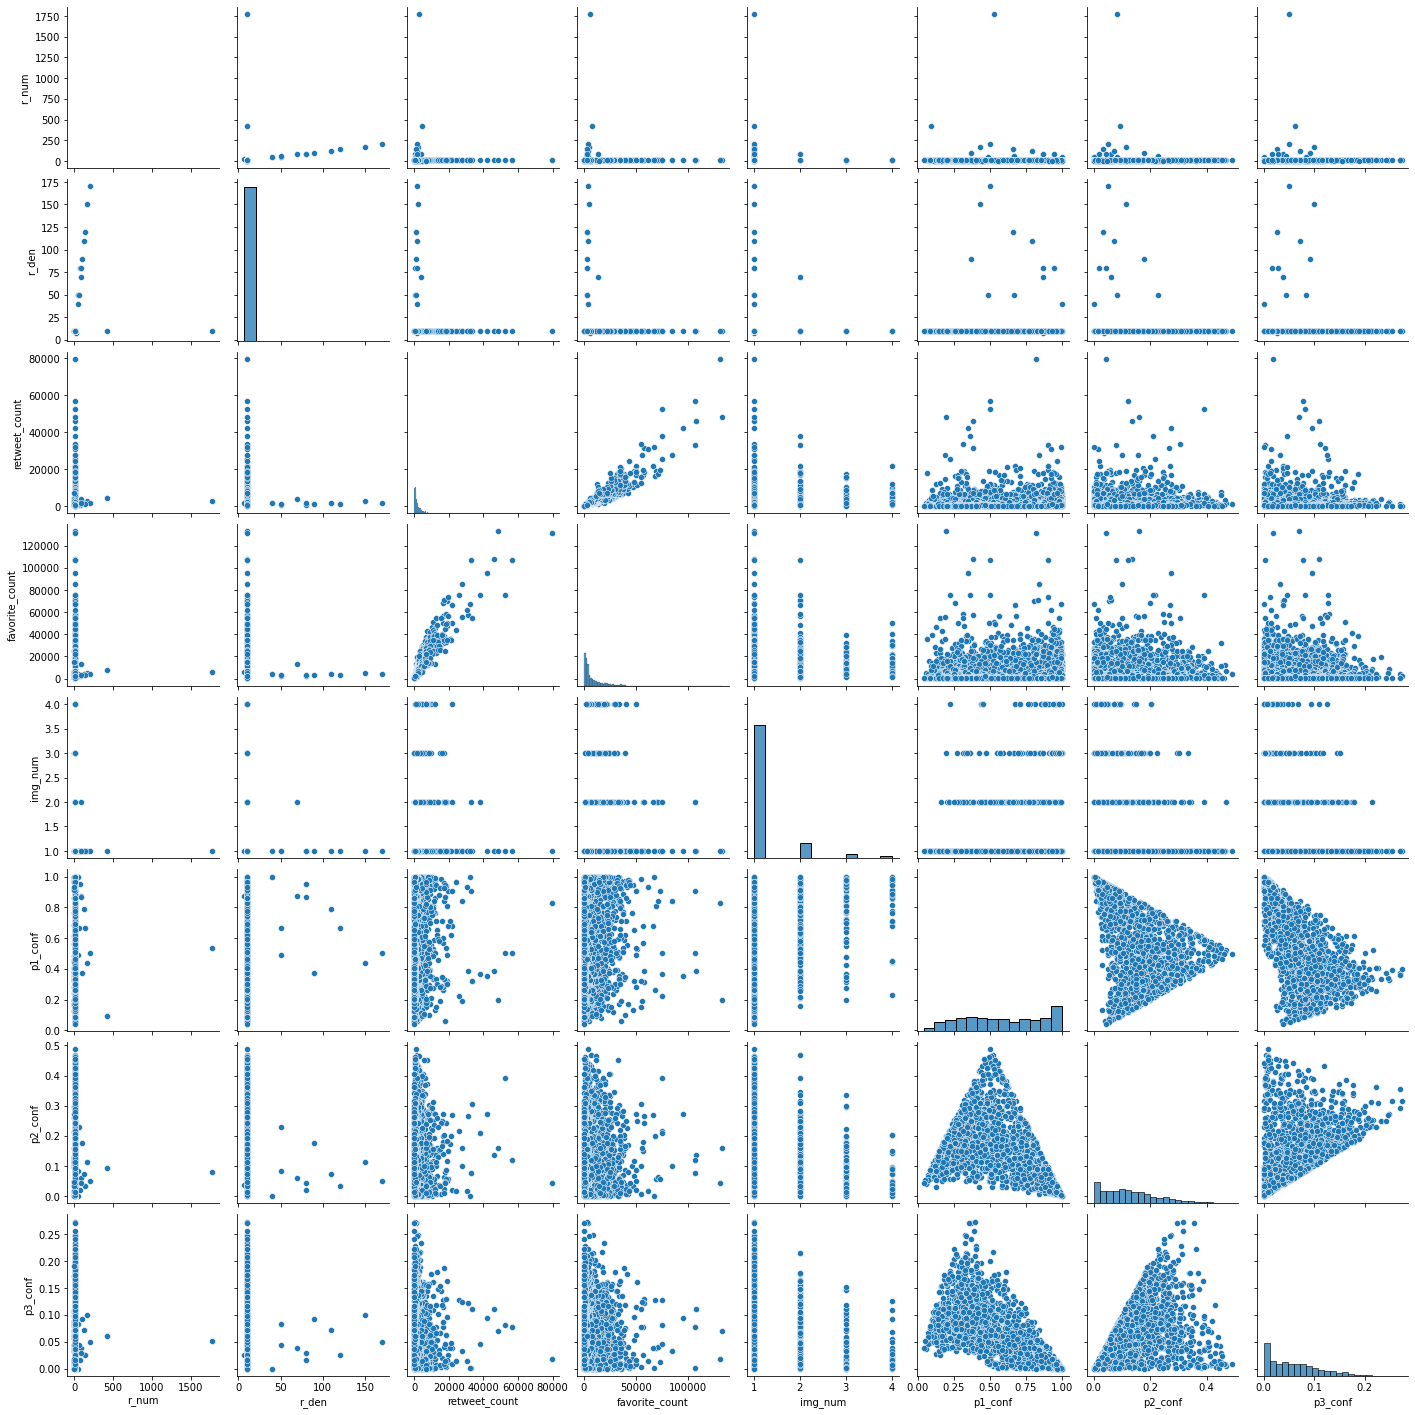

In [72]:
sns.pairplot(main_clean, vars=["r_num", "r_den", "retweet_count", "favorite_count", "img_num", "p1_conf", "p2_conf", "p3_conf"]);

### Insight 3
>On which day of the week were most retweets and favorites recorded?

In [73]:
#First, we create a new daily timed series column called "day" from the timestamp column using dt.strftime

main_clean["day"] = main_clean["timestamp"].dt.strftime("%a")

In [74]:
#Lets confirm column creation
main_clean["day"].value_counts()

Mon    321
Wed    289
Tue    288
Fri    276
Thu    276
Sun    252
Sat    247
Name: day, dtype: int64

In [75]:
#Next, we group our info by sum of retweets and favorites recorded and and days of the week those tweets were posted.

retweet_fave_days=main_clean.groupby(["day"],as_index=False)["retweet_count", "favorite_count"].sum()
retweet_fave_days.sort_values(by=["retweet_count"], ascending = False).head(7)

C:\Users\HP Compaq\AppData\Local\Temp\ipykernel_2016\4131733373.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retweet_fave_days=main_clean.groupby(["day"],as_index=False)["retweet_count", "favorite_count"].sum()


,day,retweet_count,favorite_count
6,Wed,912977,2944919
1,Mon,853817,2746451
5,Tue,794836,2660713
0,Fri,780590,2434250
2,Sat,742088,2246523
4,Thu,709326,2341051
3,Sun,677044,2212007


> **Wednesday** records most number of retweets and favorites.

## Visualization

![](https://w7.pngwing.com/pngs/875/225/png-transparent-teal-and-white-graphic-art-data-analysis-data-visualization-big-data-data-management-free-of-network-tools-icon-miscellaneous-blue-computer-science.png)

>   **What does our data look like when visualized? What analysis can we draw from it?**

For this, we'll employ a **word cloud**.

### Word Cloud

>  Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

>  A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

**source: https://boostlabs.com/blog/what-are-word-clouds-value-simple-visualizations/#**

In [76]:
#First, we create a list from the text column.

tweets = np.array(main_clean.text)
my_list = []
for tweet in tweets:
    my_list.append(tweet.replace("\n",""))

In [77]:
#Next, we create a mask from an image downloaded over the internet. Our chosen image is that of a dog from the freepik website

mask = np.array(Image.open(requests.get('https://img.freepik.com/free-vector/beagle-dog-inflatable-pool_1308-116131.jpg', stream=True).raw))
text = my_list

In [78]:
#Lastly, we define a function to generate our word cloud plus mask

def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', mask=mask).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

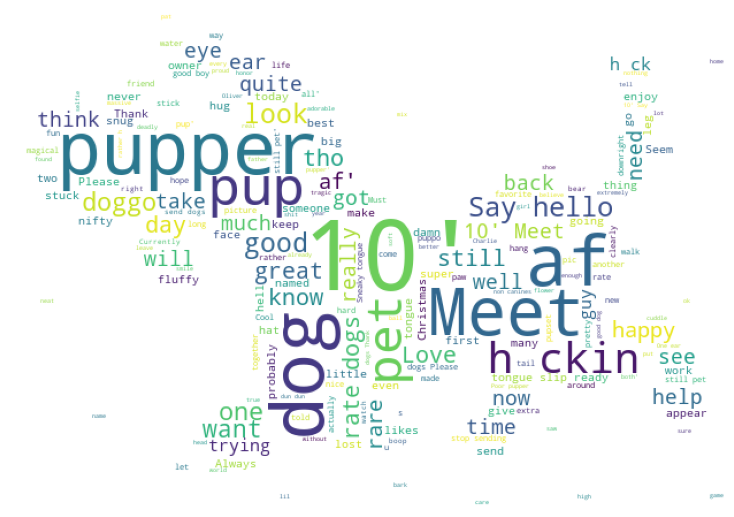

In [79]:
#Want to see magic?

generate_wordcloud(text, mask)

Apparently, from our word cloud: 

> *   There likely were more pupper stage dogs rated. 
> *   10 is quite outstanding as all the ratings almost always have a denominator 10.
> *   The word "Meet" also stands out as almost every tweet began with "Meet."